In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#1. Real-world scenario
#Uber vs. Lyft dataset from Kaggle

In [3]:
#2. Importing data
#Import csv
df=pd.read_csv("cab_rides.csv")

In [4]:
#3. Analysing data

In [5]:
#Check the values of the columns in df, found that product_id of Uber doesn't specify this is an uber product
#And also the "time_stamp" is not in Date format
df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
693066,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
693067,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
693068,1.00,Uber,1543708385534,North End,West End,NaN,1.0,64d451d0-639f-47a4-9b7c-6fd92fbd264f,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi
693069,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [6]:
#Use Regex to replace the uber product id as "uber_product", and make use of iterators to change the rows of uber id to "uber_product"
df['product_id'] = [re.sub(r"\w+-\w+-\w+-\w+-\w+", "uber_product", str(product)) for product in df['product_id']]
df['product_id']

0            lyft_line
1         lyft_premier
2                 lyft
3          lyft_luxsuv
4            lyft_plus
              ...     
693066    uber_product
693067    uber_product
693068    uber_product
693069    uber_product
693070    uber_product
Name: product_id, Length: 693071, dtype: object

In [7]:
#Add a "date" column for converting time_stamp into a readable Date format in df
df['date'] = pd.to_datetime(df['time_stamp'], unit='ms').dt.date
df['date']

0         2018-12-16
1         2018-11-27
2         2018-11-28
3         2018-11-30
4         2018-11-29
             ...    
693066    2018-12-01
693067    2018-12-01
693068    2018-12-01
693069    2018-12-01
693070    2018-12-01
Name: date, Length: 693071, dtype: object

In [8]:
#Check how many product types in the dataset
print(df['name'].unique())

['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi']


In [9]:
#Create a dictionary to categorize the trip type by product
trip_type = {
    'Lux Black':'Luxury', 'Black':'Luxury', 'Lux':'Luxury', 
    'Lux Black XL':'Luxury SUV', 'Black SUV':'Luxury SUV',
    'Lyft XL':'Standard SUV', 'UberXL':'Standard SUV',
    'Lyft':'Standard', 'UberX':'Standard',
    'Shared':'Carpool', 'UberPool':'Carpool',
    'WAV':'Assist', 'Taxi':'Taxi'
}

print(trip_type)

{'Lux Black': 'Luxury', 'Black': 'Luxury', 'Lux': 'Luxury', 'Lux Black XL': 'Luxury SUV', 'Black SUV': 'Luxury SUV', 'Lyft XL': 'Standard SUV', 'UberXL': 'Standard SUV', 'Lyft': 'Standard', 'UberX': 'Standard', 'Shared': 'Carpool', 'UberPool': 'Carpool', 'WAV': 'Assist', 'Taxi': 'Taxi'}


In [10]:
#Create a column to store the Trip Type of each order
df['trip_type'] = df['name']
df['trip_type'] = df['trip_type'].replace(trip_type)

In [11]:
#check missing data
df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
date                    0
trip_type               0
dtype: int64

In [12]:
#check which 'name' got the missing price, it shows all come from "Uber Taxi"
df.groupby(['cab_type', 'name', 'trip_type']).sum()

distance         time_stamp       price  \
cab_type name         trip_type                                                
Lyft     Lux          Luxury        112049.32  79108998640419904   910509.50   
         Lux Black    Luxury        112049.32  79109224456981712  1181605.55   
         Lux Black XL Luxury SUV    112049.32  79109177409700992  1656124.55   
         Lyft         Standard      112049.32  79109025842854304   492413.68   
         Lyft XL      Standard SUV  112049.32  79109191557016832   784375.20   
         Shared       Carpool       112047.19  79106182915438224   308929.50   
Uber     Black        Luxury        120735.12  85069157748833072  1130758.00   
         Black SUV    Luxury SUV    120736.15  85070729628852816  1668679.50   
         Taxi         Taxi          120734.23  85069239433850032        0.00   
         UberPool     Carpool       120726.22  85063113831432432   482184.00   
         UberX        Standard      120732.46  85067894413924464   537997.00   
         UberXL       Standard SUV  120736.15  85070626801991152   863803.00   
         WAV          Assist        120736.15  85070741430796752   538013.50   

                                    surge_multiplier  
cab_type name         trip_type                       
Lyft     Lux          Luxury                53139.75  
         Lux Black    Luxury                53139.75  
         Lux Black XL Luxury SUV            53139.75  
         Lyft         Standard              53184.25  
         Lyft XL      Standard SUV          53184.25  
         Shared       Carpool               51233.00  
Uber     Black        Luxury                55095.00  
         Black SUV    Luxury SUV            55096.00  
         Taxi         Taxi                  55095.00  
         UberPool     Carpool               55091.00  
         UberX        Standard              55094.00  
         UberXL       Standard SUV          55096.00  
         WAV          Assist                55096.00

In [13]:
#create a new dataframe in df to drop the Uber Taxi product, so the dataframe only contains private cars (non-taxi) trips
new_df = df.dropna()
new_df.groupby(['cab_type']).count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date,trip_type
cab_type,,,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,330568,330568,330568,330568,330568,330568,330568,330568,330568,330568,330568


In [14]:
#Store the values using Numpy Array for next calculation
np_product = np.array(new_df['name'])
np_price = np.array(new_df['price'])
np_cabtype = np.array(new_df['cab_type'])
np_triptype = np.array(new_df['trip_type'])
np_distance = np.array(new_df['distance'])

In [15]:
#Calculate the price per distance of Uber & Lyft (Using Numpy Array)
uber_price = np_price[np_cabtype == 'Uber']
uber_distance = np_distance[np_cabtype == 'Uber']
uber_price_per_distance = uber_price.sum() / uber_distance.sum()
print("Uber Price per Distance = "+ str(uber_price_per_distance))

lyft_price = np_price[np_cabtype == 'Lyft']
lyft_distance = np_distance[np_cabtype == 'Lyft']
lyft_price_per_distance = lyft_price.sum() / lyft_distance.sum()
print("Lyft Price per Distance = "+ str(lyft_price_per_distance))

if uber_price_per_distance > lyft_price_per_distance:
    print("Uber got a higher price per distance than Lyft")
elif uber_price_per_distance == lyft_price_per_distance:
    print("Uber & Lyft got the same price per distance")
else:
    print("Lyft got a higher price per distance than Uber")

Uber Price per Distance = 7.207922117856482
Lyft Price per Distance = 7.933968838236628
Lyft got a higher price per distance than Uber


In [16]:
#Define a custom function to extract the Total of Uber & Lyft and the average of them.
#Create reusable code

def total_and_avg(x, y):
    print("Uber total =",x,"and Lyft total =",y,", the average is", (x+y)/2)
    
print("---Price---")
total_and_avg(uber_price.sum(),lyft_price.sum())

print("---Distance---")
total_and_avg(uber_distance.sum(),lyft_distance.sum())

print("---Price per Distance---")
total_and_avg(uber_price_per_distance,lyft_price_per_distance)

---Price---
Uber total = 5221435.0 and Lyft total = 5333957.979999999 , the average is 5277696.489999999
---Distance---
Uber total = 724402.2499999999 and Lyft total = 672293.7899999999 , the average is 698348.0199999999
---Price per Distance---
Uber total = 7.207922117856482 and Lyft total = 7.933968838236628 , the average is 7.570945478046555


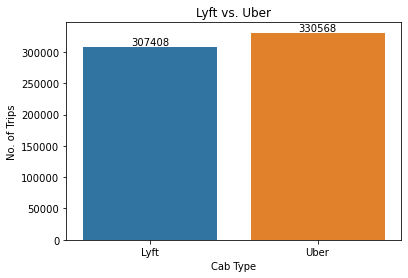

In [17]:
cab_type_chart=sns.countplot(x="cab_type", data=new_df)
cab_type_chart.bar_label(cab_type_chart.containers[0])
cab_type_chart.set_title("Lyft vs. Uber")
cab_type_chart.set(xlabel="Cab Type", ylabel="No. of Trips")
plt.show()

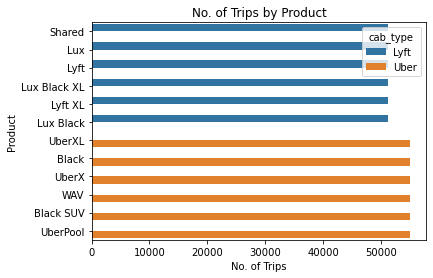

In [18]:
product_chart=sns.countplot(y="name", data=new_df, hue="cab_type")
product_chart.set_title("No. of Trips by Product")
product_chart.set(xlabel="No. of Trips", ylabel="Product")
plt.show()

<AxesSubplot:xlabel='distance', ylabel='price'>

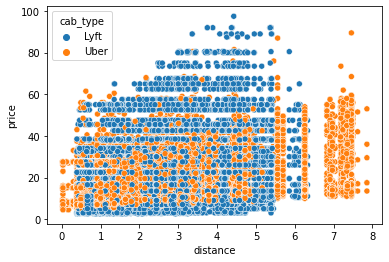

In [19]:
sns.scatterplot(x="distance", y="price", data=new_df, hue="cab_type")

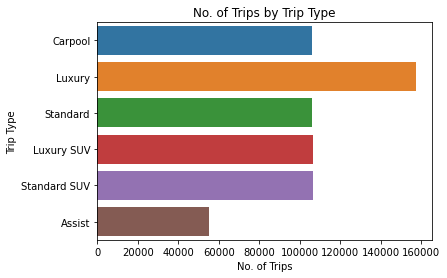

In [20]:
trip_type_chart=sns.countplot(y="trip_type", data=new_df)
trip_type_chart.set_title("No. of Trips by Trip Type")
trip_type_chart.set(xlabel="No. of Trips", ylabel="Trip Type")
plt.show()

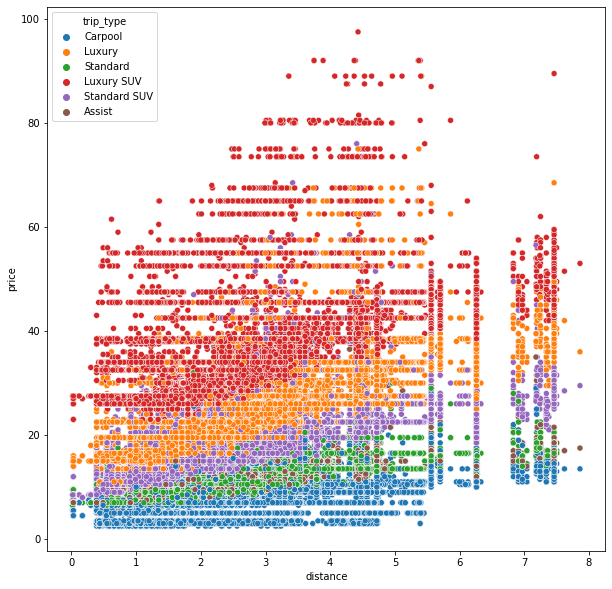

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="distance", y="price", data=new_df, hue="trip_type")
plt.show()

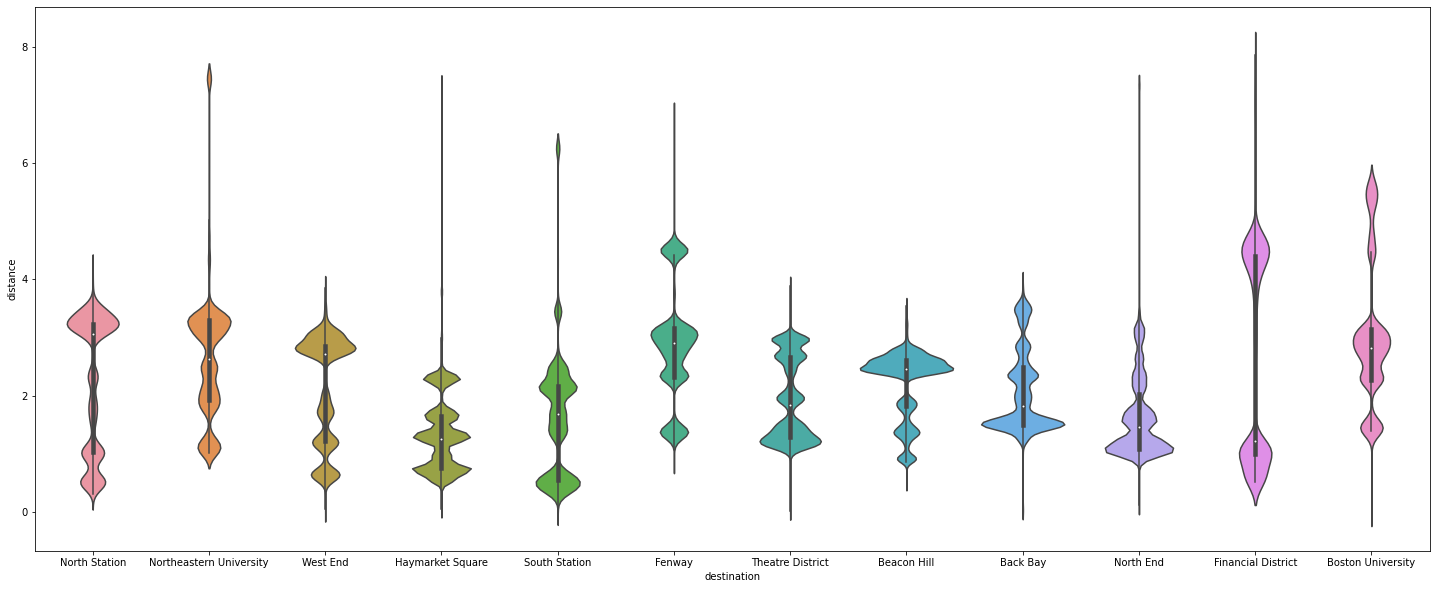

In [22]:
plt.figure(figsize=(25,10))
sns.violinplot(x="destination", y="distance", data=new_df, order=["North Station", "Northeastern University", "West End", "Haymarket Square", "South Station", "Fenway", "Theatre District", "Beacon Hill", "Back Bay", "North End", "Financial District", "Boston University"])
plt.show()

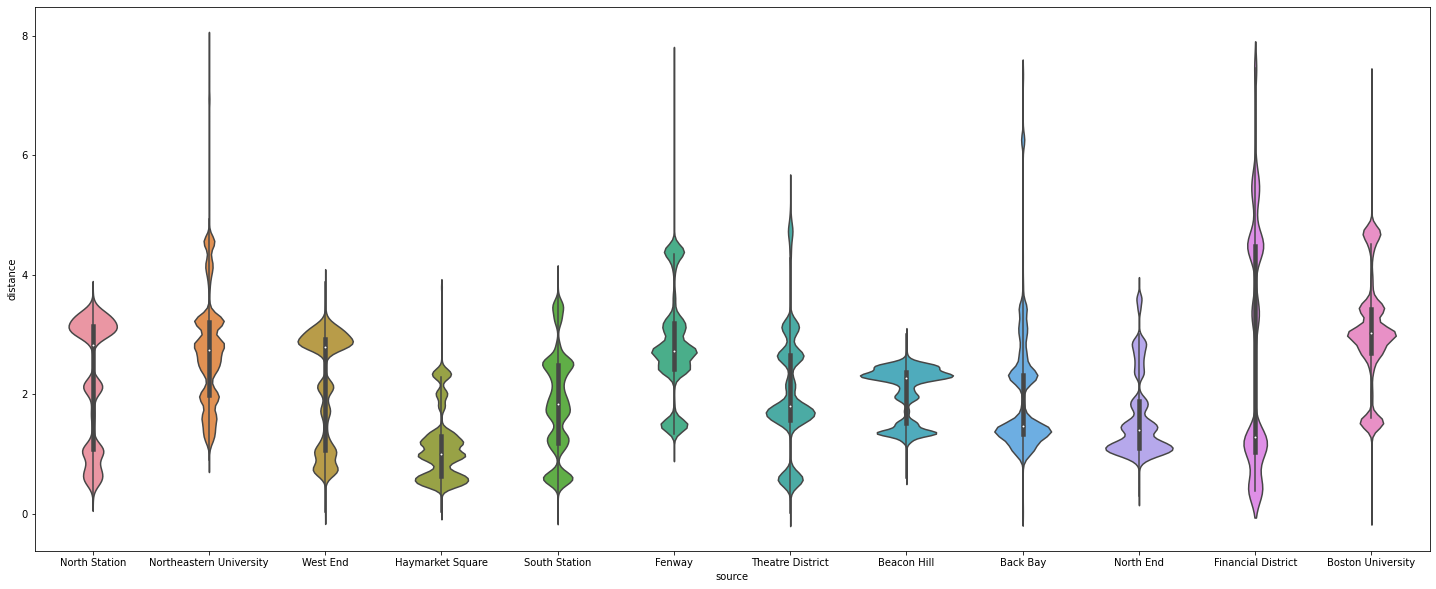

In [23]:
plt.figure(figsize=(25,10))
sns.violinplot(x="source", y="distance", data=new_df, order=["North Station", "Northeastern University", "West End", "Haymarket Square", "South Station", "Fenway", "Theatre District", "Beacon Hill", "Back Bay", "North End", "Financial District", "Boston University"])
plt.show()

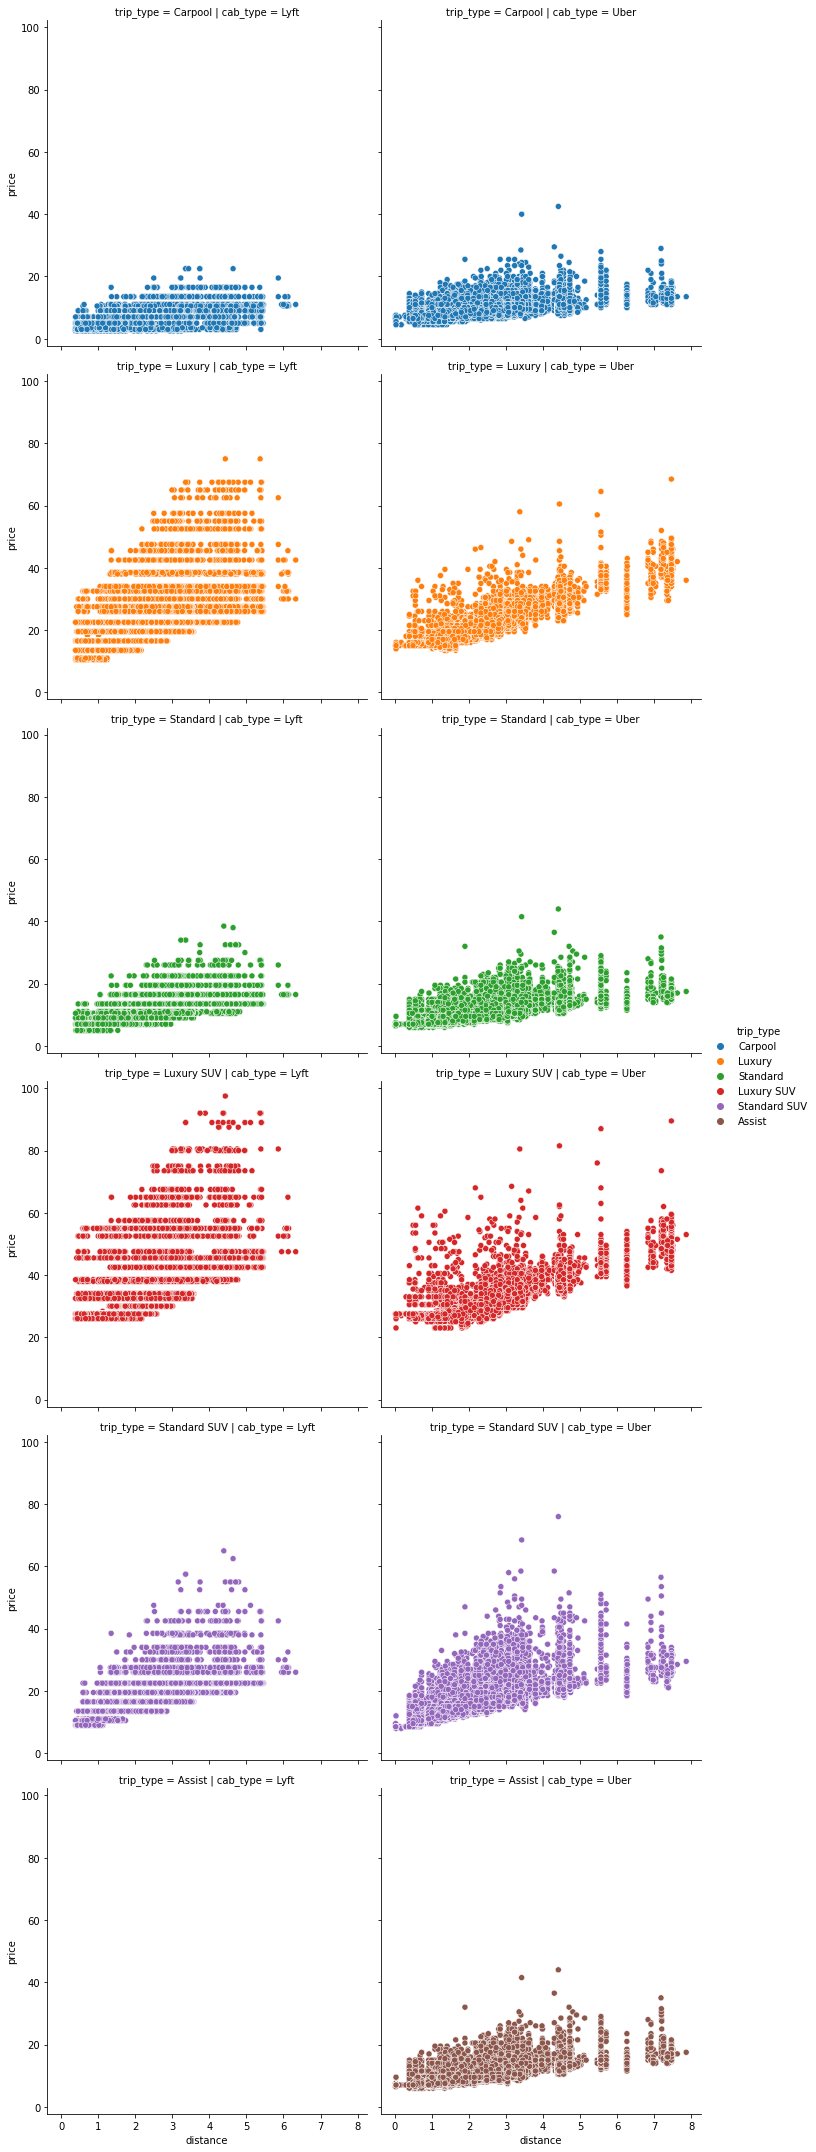

In [24]:
sns.relplot(data=new_df, x="distance", y="price", hue="trip_type", col="cab_type", row="trip_type")
plt.show()

In [25]:
#Merge dataset - merge cab_rides.csv & weather.csv
#Firstly import the weather.csv
weather_df=pd.read_csv("weather.csv")

In [26]:
#Add a "date" column for converting time_stamp into a readable Date format in weather_df
weather_df['date'] = pd.to_datetime(weather_df['time_stamp'], unit='s').dt.date

In [27]:
#Create a new dataframe in weather_df to fill the missing rain value as 0
new_weather_df = weather_df.fillna(0)
new_weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16
...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52,2018-12-03
6272,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54,2018-12-03
6273,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54,2018-12-03
6274,44.78,Theatre District,0.89,1000.70,0.0000,1543819974,0.96,1.54,2018-12-03


In [28]:
#add the date & source location in both new_df & weather_df for understanding the order placed location's weather of the day
new_df["source_date"] = new_df.source.astype("str") + " " + new_df.date.astype("str")

new_weather_df["source_date"] = new_weather_df.location.astype("str") + " " + new_weather_df.date.astype("str")
new_weather_df["source_date"]

/var/folders/6b/yqndd57501bgqdg0b5qjzz_w0000gn/T/ipykernel_42051/2625792562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["source_date"] = new_df.source.astype("str") + " " + new_df.date.astype("str")


0                      Back Bay 2018-12-16
1                   Beacon Hill 2018-12-16
2             Boston University 2018-12-16
3                        Fenway 2018-12-16
4            Financial District 2018-12-16
                       ...                
6271              North Station 2018-12-03
6272    Northeastern University 2018-12-03
6273              South Station 2018-12-03
6274           Theatre District 2018-12-03
6275                   West End 2018-12-03
Name: source_date, Length: 6276, dtype: object

In [29]:
#merge new_df & new_weather_df dataset to have the start locations' weather conditions
new_weather_df.index = new_weather_df['source_date']
merged_df = new_df.join(new_weather_df, on=['source_date'], rsuffix="_right")
merged_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_right,humidity,wind,date_right,source_date_right
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49,2018-12-16,Haymarket Square 2018-12-16
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,41.68,Haymarket Square,0.44,1023.68,0.0000,1544924701,0.71,6.28,2018-12-16,Haymarket Square 2018-12-16
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,42.75,Haymarket Square,0.17,1023.04,0.0000,1544921101,0.71,6.45,2018-12-16,Haymarket Square 2018-12-16
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,40.99,Haymarket Square,0.40,1024.49,0.0000,1544928301,0.71,6.38,2018-12-16,Haymarket Square 2018-12-16
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,40.15,Haymarket Square,0.41,1023.50,0.0000,1544939101,0.70,7.82,2018-12-16,Haymarket Square 2018-12-16


In [30]:
X = merged_df[["distance", "price"]].values
y = merged_df["cab_type"].values
print(X.shape, y.shape)

(24606292, 2) (24606292,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [32]:
#Import csv for Machine Learning
ml_df=pd.read_csv("quality_of_life.csv")
ml_df

,country,stability,rights,health,safety,climate,costs,popularity
0,Australia,86,92,87,100,90,23,41
1,Hong Kong,77,85,100,97,49,61,52
2,San Marino,81,82,91,87,62,61,46
3,Macao,90,71,100,93,48,61,50
4,Switzerland,91,99,93,99,34,44,40
...,...,...,...,...,...,...,...,...
132,Cameroon,40,19,9,27,60,51,34
133,Nigeria,18,24,12,23,54,57,39
134,Chad,46,12,0,31,50,49,44
135,Sudan,8,11,18,55,40,66,24


In [33]:
#Creating feature and target arrays
X = ml_df.drop(["safety", "country"], axis=1).values
y = ml_df["safety"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [34]:
#Making predictions from a single feature
X_stability = X[:,1]
print(y.shape, X_stability.shape)

(137,) (137,)


In [35]:
X_stability = X_stability.reshape(-1,1)
print(X_stability.shape)

(137, 1)


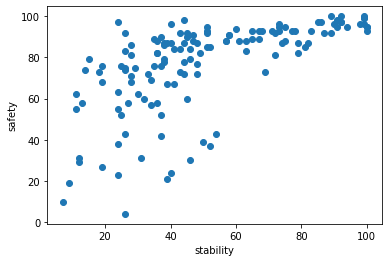

In [36]:
#Plotting Safety vs. Stability
plt.scatter(X_stability, y)
plt.ylabel("safety")
plt.xlabel("stability")
plt.show()

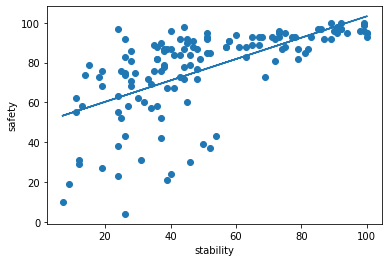

In [37]:
#Fitting a regression model
reg = LinearRegression()
reg.fit(X_stability, y)
predictions = reg.predict(X_stability)
plt.scatter(X_stability, y)
plt.plot(X_stability, predictions)
plt.ylabel("safety")
plt.xlabel("stability")
plt.show()

In [38]:
#Get the R-squared score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.5590330647874324

In [39]:
#Cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)
print(cv_results)

[ 0.5916073   0.50625665 -0.17421983  0.41626364  0.35433109  0.51724074]


In [40]:
print(np.mean(cv_results), np.std(cv_results))

0.3685799333528194 0.25426510876342623


In [41]:
print(np.quantile(cv_results, [0.025, 0.975]))

[-0.10815097  0.58231148]
